<a href="https://colab.research.google.com/github/leoquiroa/DeepLearning/blob/master/SOMv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Part 1 - Identify the Frauds with the Self-Organizing Map


In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

In [0]:
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/leoquiroa/DeepLearning/master/Data/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# Training the SOM
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

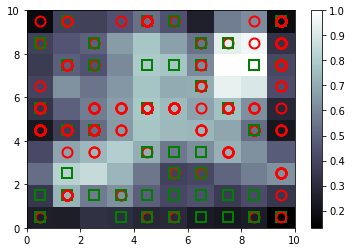

In [13]:
# Visualizing the results
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [0]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((
    mappings[(7,8)],
    mappings[(8,8)], 
    mappings[(8,7)]
), axis = 0)
frauds = sc.inverse_transform(frauds)

In [34]:
len(frauds)

12

# Part 2 - Going from Unsupervised to Supervised Deep Learning


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# Creating the matrix of features
customers = dataset.iloc[:, 1:].values

In [0]:
# Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [0]:
# Feature Scaling
sc = StandardScaler()
customers = sc.fit_transform(customers)

# Part 2 - Now let's make the ANN!



In [0]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 1s 1ms/step - loss: 0.4708 - acc: 0.9957
Epoch 2/2
690/690 [==============================] - 1s 1ms/step - loss: 0.0845 - acc: 1.0000


In [0]:
# Predicting the probabilities of frauds
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [46]:
print(len(y_pred))
y_pred

690


array([[1.56058720e+07, 9.85682011e-03],
       [1.57684740e+07, 1.03724599e-02],
       [1.56471910e+07, 1.05066895e-02],
       ...,
       [1.55941330e+07, 1.00558072e-01],
       [1.58137180e+07, 1.20983273e-01],
       [1.57128770e+07, 1.23541385e-01]])